In [1]:
%matplotlib inline
from pprint import pprint
from collections import defaultdict

import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier

from sklearn.grid_search import GridSearchCV
from sklearn import metrics

import sys
sys.path.append('../dev')

from ml_plot import plot_validation_curve
from ml_plot import PredictCV, my_plot_learning_curve
from ml_plot import plot_prediction_curve
from ml_plot import get_dataset, eval_predictions

# Configuration

In [2]:
# PROJECT = 'nova'
# PROJECT = 'swift'
# PROJECT = 'cinder'
PROJECT = 'heat'
# PROJECT = 'glance'

# IMPORTANCE = 'crit'
# IMPORTANCE = 'high+'
IMPORTANCE = 'med+'
# IMPORTANCE = 'low+'

# SIZE = 100
#SIZE = 250
# SIZE = 0.1
SIZE = 0.5

SCORING = 'f1'         # (precision * recall) / (precision + recall)
# SCORING = 'accuracy'   # (TP + TN) / all values
# SCORING = 'precision'  # TP / (TP + FP)
# SCORING = 'recall'     # TP / (TP + FN)
# SCORING = 'average_precision'
# SCORING = 'roc_auc'

JOBS = 4
VERBOSE = 0

warnings.filterwarnings('ignore', 'F-score is ill-defined')
warnings.filterwarnings('ignore', 'overflow encountered in exp')

# Load Data

In [3]:
%%capture
Y, X = get_dataset(PROJECT, IMPORTANCE)

### Select Split Strategy

In [4]:
cv = PredictCV(len(Y), history=1000, future=500, n_iter=100)

# Initial Parameter Settings

In [5]:
estimator = GaussianNB()

# Learning Curve

<module 'matplotlib.pyplot' from '/Users/doug/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

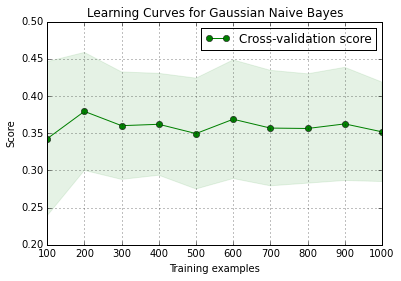

In [6]:
title = "Learning Curves for Gaussian Naive Bayes"
my_plot_learning_curve(estimator, title, X, Y,
                           n_jobs=JOBS, future=500,
                           history_sizes=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                           n_iter=100)

# Prediction Curve

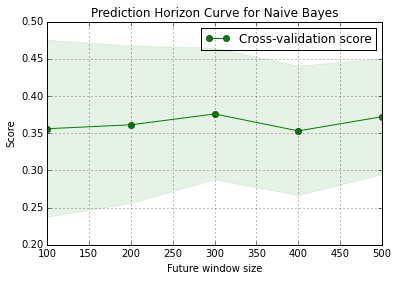

In [7]:
title = "Prediction Horizon Curve for Naive Bayes"
plot_prediction_curve(estimator, title, X, Y,
                           n_jobs=JOBS, history=500,
                           future_sizes=[100, 200, 300, 400, 500],
                           n_iter=100)
plt.show()

In [8]:
NB_results = eval_predictions(estimator, X, Y, history_sizes=[100, 200, 300, 400, 500, 1000],
                              future_sizes=[100, 200, 300, 400, 500],
                              n_iter=100)

** Predictions for hist=100 future=100 **

F1:        0.33  +/- 0.13
Accuracy:  0.60  +/- 0.12
Precision: 0.33  +/- 0.15
Recall:    0.37  +/- 0.17

Aggregate Confusion Matrix - 100 iterations
[[4902 2218]
 [1738 1142]]


** Predictions for hist=100 future=200 **

F1:        0.35  +/- 0.12
Accuracy:  0.59  +/- 0.10
Precision: 0.33  +/- 0.12
Recall:    0.40  +/- 0.17

Aggregate Confusion Matrix - 100 iterations
[[9303 4859]
 [3295 2543]]


** Predictions for hist=100 future=300 **

F1:        0.35  +/- 0.11
Accuracy:  0.59  +/- 0.08
Precision: 0.32  +/- 0.10
Recall:    0.41  +/- 0.16

Aggregate Confusion Matrix - 100 iterations
[[13994  7348]
 [ 4957  3701]]


** Predictions for hist=100 future=400 **

F1:        0.34  +/- 0.10
Accuracy:  0.57  +/- 0.06
Precision: 0.31  +/- 0.10
Recall:    0.42  +/- 0.14

Aggregate Confusion Matrix - 100 iterations
[[17902 10666]
 [ 6487  4945]]


** Predictions for hist=100 future=500 **

F1:        0.36  +/- 0.09
Accuracy:  0.57  +/- 0.06
Precision: 0.